In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
data = data.drop(columns='Cabin')

In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
df = data

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df.isnull().sum(

)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Embarked'].isnull().sum()


np.int64(2)

In [15]:
df['Embarked'].mode()

,Embarked
0,S


In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-14-3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [19]:
sns.set()

[Text(0, 0, '549'), Text(0, 0, '342')]

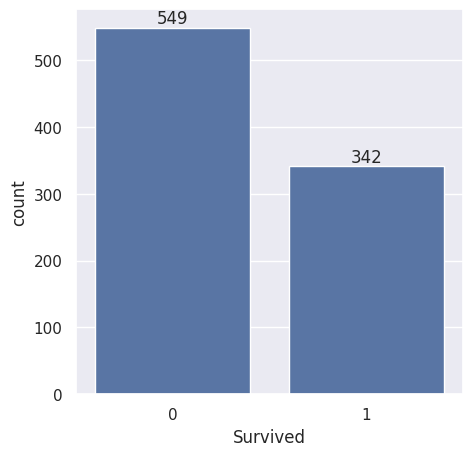

In [23]:
plt.figure(figsize = (5,5))
bx = sns.countplot(x = 'Survived',data =df)
bx.bar_label(bx.containers[0])

[Text(0, 0, '577'), Text(0, 0, '314')]

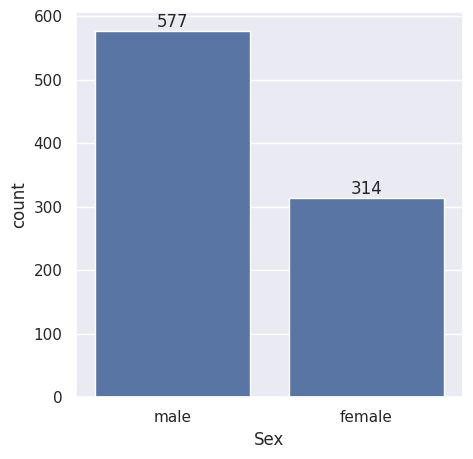

In [24]:
plt.figure(figsize = (5,5))
bx = sns.countplot(x = 'Sex',data =df)
bx.bar_label(bx.containers[0])

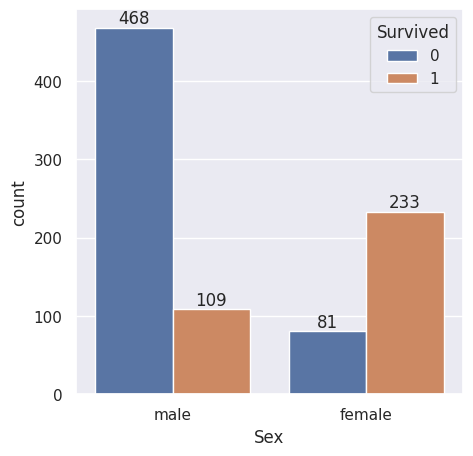

In [32]:
plt.figure(figsize = (5,5))
bx = sns.countplot(x = 'Sex',data =df,hue = 'Survived')
bx.bar_label(bx.containers[1])
bx.bar_label(bx.containers[0])
plt.show()

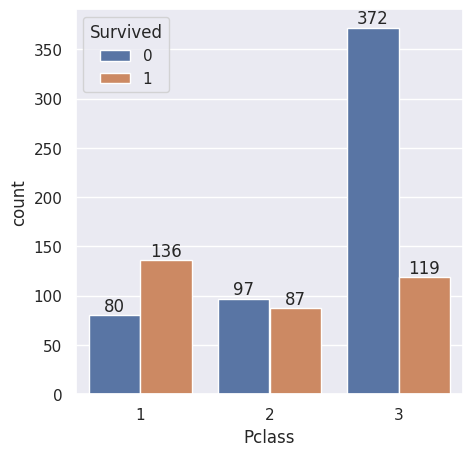

In [35]:
plt.figure(figsize = (5,5))
bx = sns.countplot(x = 'Pclass',data =df,hue = 'Survived')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.show()

In [38]:
df = df.replace({
    'Sex':{  'male':0,'female':1  },
    'Embarked':{ 'S':0, 'C':1,'Q':2 }
}
)

/tmp/ipython-input-38-3962997941.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [39]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [41]:


x = df.drop(columns = ['PassengerId' , 'Name','Ticket','Survived'])
y = df['Survived']

In [42]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [44]:


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
model = LogisticRegression()

In [46]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:


x_train_pred = model.predict(x_train)

In [61]:
print(accuracy_score(y_train,x_train_pred))

0.8075842696629213


In [56]:
y_pred = model.predict(x_test)

In [57]:
print(accuracy_score(y_test,y_pred))

0.7821229050279329


In [64]:
import joblib
joblib.dump( model,"logisticregression.pkl")


['logisticregression.pkl']

In [66]:
!pip install pyngrok
import subprocess
import os
from pyngrok import ngrok

ngrok.set_auth_token('30MgWydobKi3YU3oI04d5yjrFOB_429PMydfpAX2qPQJUiPe1')
os.system("nohup python -m flask run --no-reload &")

proc = subprocess.Popen(["ngrok","http","5000"])

public_url = ngrok.connect(addr = "5000",proto = "http")
print("url :",public_url)

url : NgrokTunnel: "https://090b950c10bf.ngrok-free.app" -> "http://localhost:5000"


In [68]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logisticregression.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
  <!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Titanic Survival Prediction</title>
  <style>
    body {
      background: linear-gradient(135deg, #001f3f, #0074D9);
      color: #fff;
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      display: flex;
      flex-direction: column;
      align-items: center;
      padding: 40px;
      min-height: 100vh;
    }
    h1 {
      font-size: 2.5rem;
      margin-bottom: 20px;
      text-shadow: 2px 2px #000;
    }
    form {
      background: rgba(255,255,255,0.1);
      padding: 30px;
      border-radius: 15px;
      box-shadow: 0 8px 16px rgba(0,0,0,0.3);
      display: grid;
      gap: 15px;
      width: 100%;
      max-width: 400px;
    }
    label {
      font-weight: bold;
      margin-bottom: 5px;
    }
    input {
      padding: 10px;
      border-radius: 8px;
      border: none;
      font-size: 1rem;
      width: 100%;
      box-sizing: border-box;
    }
    button {
      background: #FF4136;
      color: white;
      padding: 12px;
      font-size: 1.2rem;
      border: none;
      border-radius: 8px;
      cursor: pointer;
      transition: background 0.3s ease;
    }
    button:hover {
      background: #FF6347;
    }
    #predictionResult {
      margin-top: 20px;
      font-size: 1.5rem;
      font-weight: bold;
      color: #FFD700;
      text-shadow: 1px 1px #000;
    }
    img {
      margin-top: 40px;
      border-radius: 15px;
      max-width: 100%;
      box-shadow: 0 8px 16px rgba(0,0,0,0.3);
    }
  </style>
</head>
<body>
  <h1>✨ Titanic Survival Prediction ✨</h1>
  <form id="predictionForm" method="post" action="/predict">
    <div>
      <label for="pclass">Passenger Class:</label>
      <input type="number" id="pclass" name="pclass" placeholder="1, 2 or 3">
    </div>
    <div>
      <label for="sex">Sex (0=Male, 1=Female):</label>
      <input type="number" id="sex" name="sex" placeholder="0 or 1">
    </div>
    <div>
      <label for="age">Age:</label>
      <input type="number" step="0.1" id="age" name="age" placeholder="e.g. 29">
    </div>
    <div>
      <label for="sibsp">Siblings/Spouses Aboard:</label>
      <input type="number" id="sibsp" name="sibsp">
    </div>
    <div>
      <label for="parch">Parents/Children Aboard:</label>
      <input type="number" id="parch" name="parch">
    </div>
    <div>
      <label for="fare">Fare:</label>
      <input type="number" step="0.01" id="fare" name="fare" placeholder="e.g. 72.5">
    </div>
    <div>
      <label for="embarked">Embarked (0=S,1=C,2=Q):</label>
      <input type="number" id="embarked" name="embarked" placeholder="0,1 or 2">
    </div>
    <button type="button" onclick="predictSurvival()">✨ Predict ✨</button>
  </form>

  <p id="predictionResult"></p>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic">

  <script>
    function predictSurvival() {
      var xhr = new XMLHttpRequest();
      var url = "/predict";
      var data = new FormData(document.getElementById("predictionForm"));
      xhr.open("POST", url, true);
      xhr.onreadystatechange = function () {
        if (xhr.readyState === 4 && xhr.status === 200) {
          var response = JSON.parse(xhr.responseText);
          document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + (response.prediction === 1 ? "🌿 Survived" : "⚠️ Did Not Survive");
        }
      };
      xhr.send(data);
    }
  </script>
</body>
</html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://695af13f1155.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 12:19:08] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 12:19:09] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [25/Jul/2025 12:19:39] "POST /predict HTTP/1.1" 200 -
